## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_df = pd.merge(mouse_metadata, study_results, how = "left", on = "Mouse ID")

# Display the data table for preview
study_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
study_data_df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_row = study_data_df[study_data_df.duplicated(["Mouse ID","Timepoint"])]
duplicate_row

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_mouse = study_data_df[(study_data_df["Mouse ID"]=="g989")].index
study_data_df.drop(drop_mouse, inplace= True)

In [6]:
#Copy dataframe for use at later point
raw_data_df = study_data_df.copy()

In [7]:
# Filter data, keeping only last row of each mouse id
study_data_df.drop_duplicates("Mouse ID",keep = "last", inplace = True)

study_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [8]:
# Copy dataframe to use at later point
clean_data_df = study_data_df.copy()

In [9]:
# Checking the number of mice in the clean DataFrame.
study_data_df["Mouse ID"].nunique()

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_mean = study_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_median = study_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_var = study_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_std = study_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_sem = study_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

drug_stats = pd.DataFrame({"Mean" :tumor_mean, "Median": tumor_median, "Variance": tumor_var, "Standard Deviation": tumor_std,"SEM":tumor_sem})
drug_stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.493884,55.591622,70.822755,8.415626,1.717832
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
study_data_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].agg('mean')
drug_group_stats = study_data_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].agg(["mean", "median", 'var', "std", "sem"])
drug_group_stats = drug_group_stats.rename({"var":"variance", "std": "standard deviation"}, axis=1)

drug_group_stats

,mean,median,variance,standard deviation,sem
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.493884,55.591622,70.822755,8.415626,1.717832
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


## Bar and Pie Charts

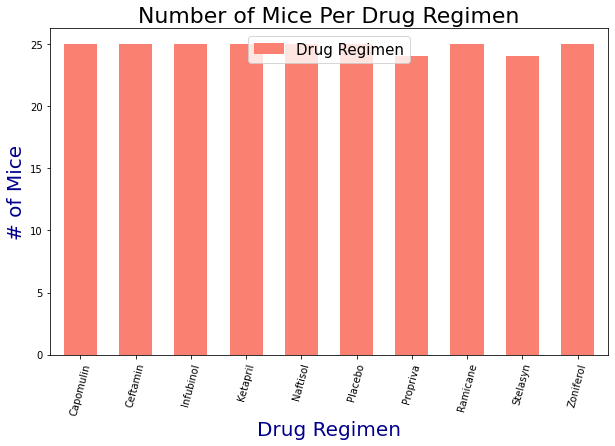

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# Count number of mice per drug regimen
drug_regimen = study_data_df[["Mouse ID", "Drug Regimen"]]
mice_per_regimen = drug_regimen.groupby('Drug Regimen').count()


# Create bar plot showing mice per drug regimen
mice_per_regimen.plot(kind="bar", figsize=(10,6), rot= 75, 
                      color= "salmon", width= 0.6)

params = {'legend.fontsize':15,
         'xtick.labelsize':15}
plt.rcParams.update(params)

plt.title("Number of Mice Per Drug Regimen", size= 22)
plt.legend(["Drug Regimen"], loc="upper center")
plt.xlabel('Drug Regimen', size= 20, color= "darkblue")
plt.ylabel("# of Mice", size= 20, color= "darkblue")

plt.savefig("Graphs/Pandas_BarPlot_Treatment")
plt.show()


In [13]:
mice_per_regimen

,Mouse ID
Drug Regimen,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Propriva,24
Ramicane,25
Stelasyn,24


In [14]:
# Create list of all drug regimens
drug_list = study_data_df["Drug Regimen"].unique()

# Set x and y axis, and tick locations
y_axis = mice_per_regimen["Mouse ID"]
x_axis = np.arange(len(drug_list))
tick_locations = [drug for drug in x_axis]

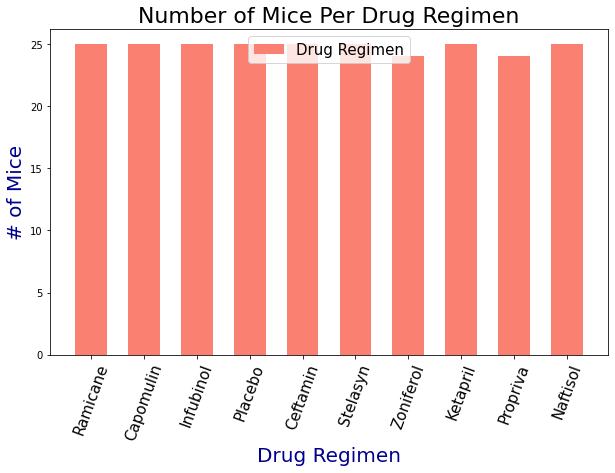

In [15]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.figure(figsize=(10,6))
plt.bar(drug_list, y_axis , color ="salmon", align="center", alpha=1, width= 0.6)
plt.xticks(tick_locations, drug_list, size = 15, rotation=70)

plt.title("Number of Mice Per Drug Regimen", size= 22)
plt.xlabel("Drug Regimen", size= 20, color= "darkblue")
plt.ylabel("# of Mice", size= 20, color= "darkblue")
plt.legend(["Drug Regimen"], loc="upper center")

plt.savefig("Graphs/Pyplot_BarPlot_Treatment")
plt.show()

In [16]:
study_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [17]:
# Get total number of male and female mice in study
gender_count = study_data_df.groupby("Sex")["Mouse ID"].count()
gender_df = pd.DataFrame({"Gender Count": gender_count})

gender_df

,Gender Count
Sex,
Female,123
Male,125


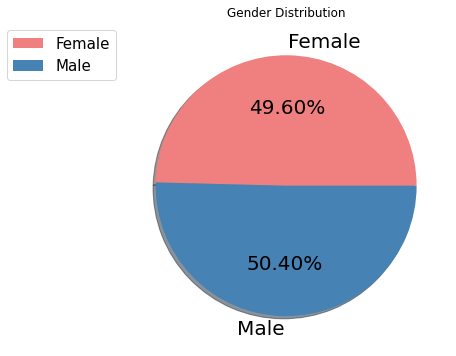

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Plot percentage of each gender in study

# create an axis
fig, axis_1=plt.subplots(1, 1)
labels= ["Female", "Male"]
colors=["lightcoral", "steelblue"]
gender_df.plot(kind="pie", y ="Gender Count", figsize=(6,6), labels= labels, 
               colors= colors, autopct='%.2f%%', shadow= True, title="Gender Distribution",
               fontsize=20, ax=axis_1)
plt.legend(labels, bbox_to_anchor=(0,1))
axis_1.set_ylabel(' ')

plt.savefig("Graphs/Panda_Gender_Count_Pie_Plot")
plt.show()

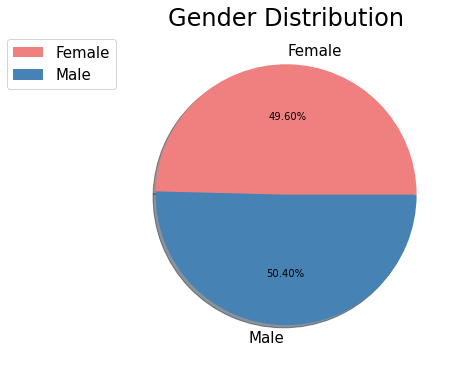

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Get total number of male and female mice in study
gender = study_data_df.groupby("Sex")["Mouse ID"].count()

# Plot percentage of each gender in study
plt.figure(figsize=(6,6))

plt.pie(gender, colors=colors, autopct='%.2f%%', shadow= True, labels=labels)
plt.rcParams['font.size']= 20.0
plt.title("Gender Distribution")
plt.legend(labels, bbox_to_anchor=(0,1))

plt.savefig("Graphs/Pyplot_Gender_Count_Pie_Plot")
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create dataframe containing only data for 4 specific drugs, and only last timepoint and tumor volume for each mouse
tumor_data = clean_data_df.groupby(["Drug Regimen", "Mouse ID"])[["Mouse ID","Drug Regimen","Tumor Volume (mm3)","Timepoint"]].head()
tumor_data = tumor_data[tumor_data['Drug Regimen'].isin(treatment_list)]

tumor_data

,Mouse ID,Drug Regimen,Tumor Volume (mm3),Timepoint
9,k403,Ramicane,22.050126,45
19,s185,Capomulin,23.343598,45
29,x401,Capomulin,28.484033,45
39,m601,Capomulin,28.430964,45
49,g791,Ramicane,29.128472,45
...,...,...,...,...
1797,x822,Ceftamin,61.386660,45
1813,y163,Infubinol,67.685569,45
1845,y769,Ceftamin,68.594745,45
1855,y865,Ceftamin,64.729837,45


In [22]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Create empty lists to store for loop data
lowerq_list=[]
upperq_list=[]
iqr_list = []
lower_bound_list = []
upper_bound_list = []
final_vol = []

# Create for loop to get IQR and quartile data
for drug in treatment_list:
    treatment_df= tumor_data[tumor_data["Drug Regimen"]==drug]
    final_vol.append(treatment_df["Tumor Volume (mm3)"])
    quartiles = treatment_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq= quartiles[.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    iqr_list.append(iqr)    
    lower_bound_list.append(lower_bound)
    upper_bound_list.append(upper_bound)
    lowerq_list.append(lowerq)
    upperq_list.append(upperq)


# Create dataframe for IQR and quartile data
treatment_quartiles_df = pd.DataFrame({"Drug Regimens": treatment_list, 
                                       "Lower Quartile": lowerq_list,
                                       "Upper Quartile": upperq_list,
                                       "IQR": iqr_list,
                                       "Lower Bound": lower_bound_list,
                                       "Upper Bound": upper_bound_list})

treatment_quartiles_df  

,Drug Regimens,Lower Quartile,Upper Quartile,IQR,Lower Bound,Upper Bound
0,Capomulin,32.377357,40.159220,7.781863,20.704562,51.832015
1,Ramicane,31.560470,40.659006,9.098537,17.912664,54.306811
2,Infubinol,54.048608,65.525743,11.477135,36.832905,82.741446
3,Ceftamin,48.722078,64.299830,15.577752,25.355450,87.666458


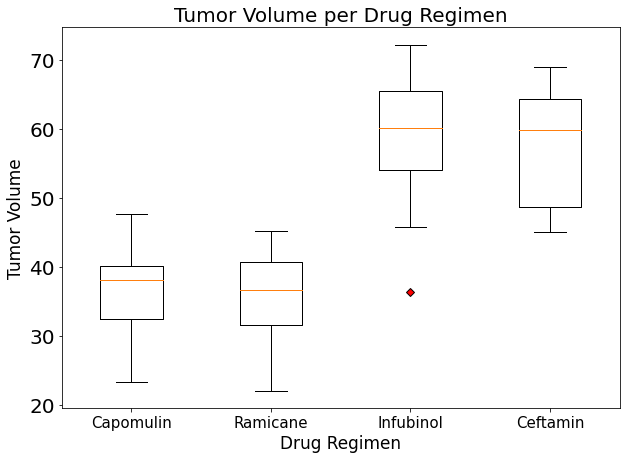

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

outlier_color = dict(markerfacecolor='red', marker='D')
fig1, ax1 = plt.subplots(figsize=(10,7))

plt.sca(ax1)

ax1.set_title('Tumor Volume per Drug Regimen', size = 20)
ax1.set_xlabel('Drug Regimen', size = 17)
ax1.set_ylabel('Tumor Volume', size = 17)
ax1.set_xticklabels(treatment_list, size = 15)


ax1.boxplot(final_vol, flierprops=outlier_color)

plt.savefig("Graphs/Boxplt_TumorVol_Treatment")
plt.show()

## Line and Scatter Plots

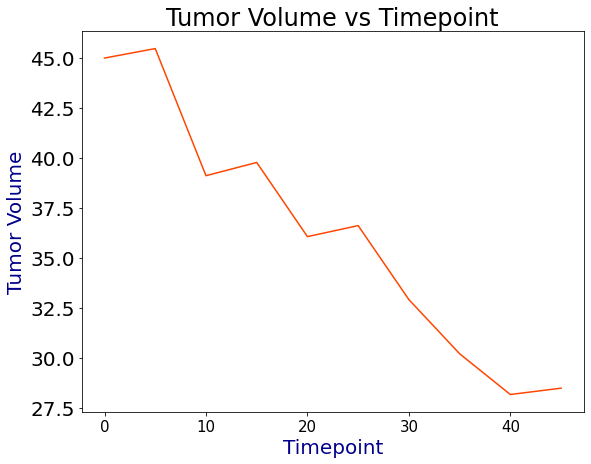

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Create variables and dataframe to draw data for an individual mouse with timepoints treated with Caplomulin 
mouse_unique= "x401"
mouse_drug= "Capomulin"
tumor_timept_df = raw_data_df.loc[raw_data_df["Mouse ID"] == mouse_unique]

# Plot data
plt.figure(figsize=(9,7))
plt.plot(tumor_timept_df["Timepoint"], tumor_timept_df["Tumor Volume (mm3)"], color= "orangered")
plt.title("Tumor Volume vs Timepoint")
plt.xlabel("Timepoint", color= "darkblue")
plt.ylabel("Tumor Volume", color= "darkblue")


plt.savefig("Graphs/TumorVol_Timepoint")
plt.show()

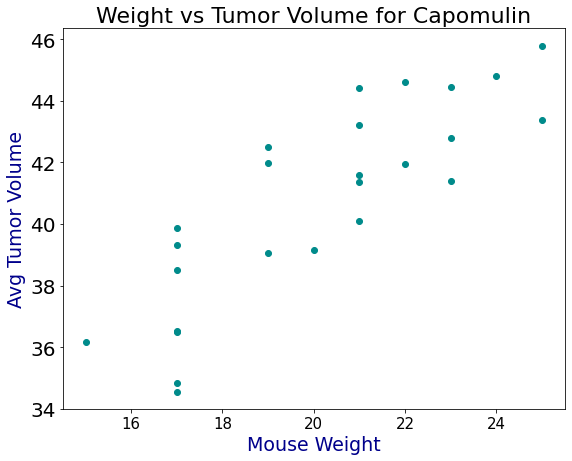

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = pd.DataFrame(raw_data_df[raw_data_df["Drug Regimen"]== "Capomulin"])
avg_capo = capomulin_df.groupby("Mouse ID").mean()


plt.figure(figsize = (9,7))
plt.title('Weight vs Tumor Volume for Capomulin', size = 22)
plt.xlabel('Mouse Weight',size= 19,  color= "darkblue")
plt.ylabel('Avg Tumor Volume', size= 19,  color= "darkblue")
plt.scatter(avg_capo["Weight (g)"], avg_capo["Tumor Volume (mm3)"], color= "darkcyan")

plt.savefig("Graphs/Scatter_Wt_TumorVol")
plt.show()           

## Correlation and Regression

In [26]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_capo["Weight (g)"], avg_capo["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


The r-squared value is: 0.7088568047708717


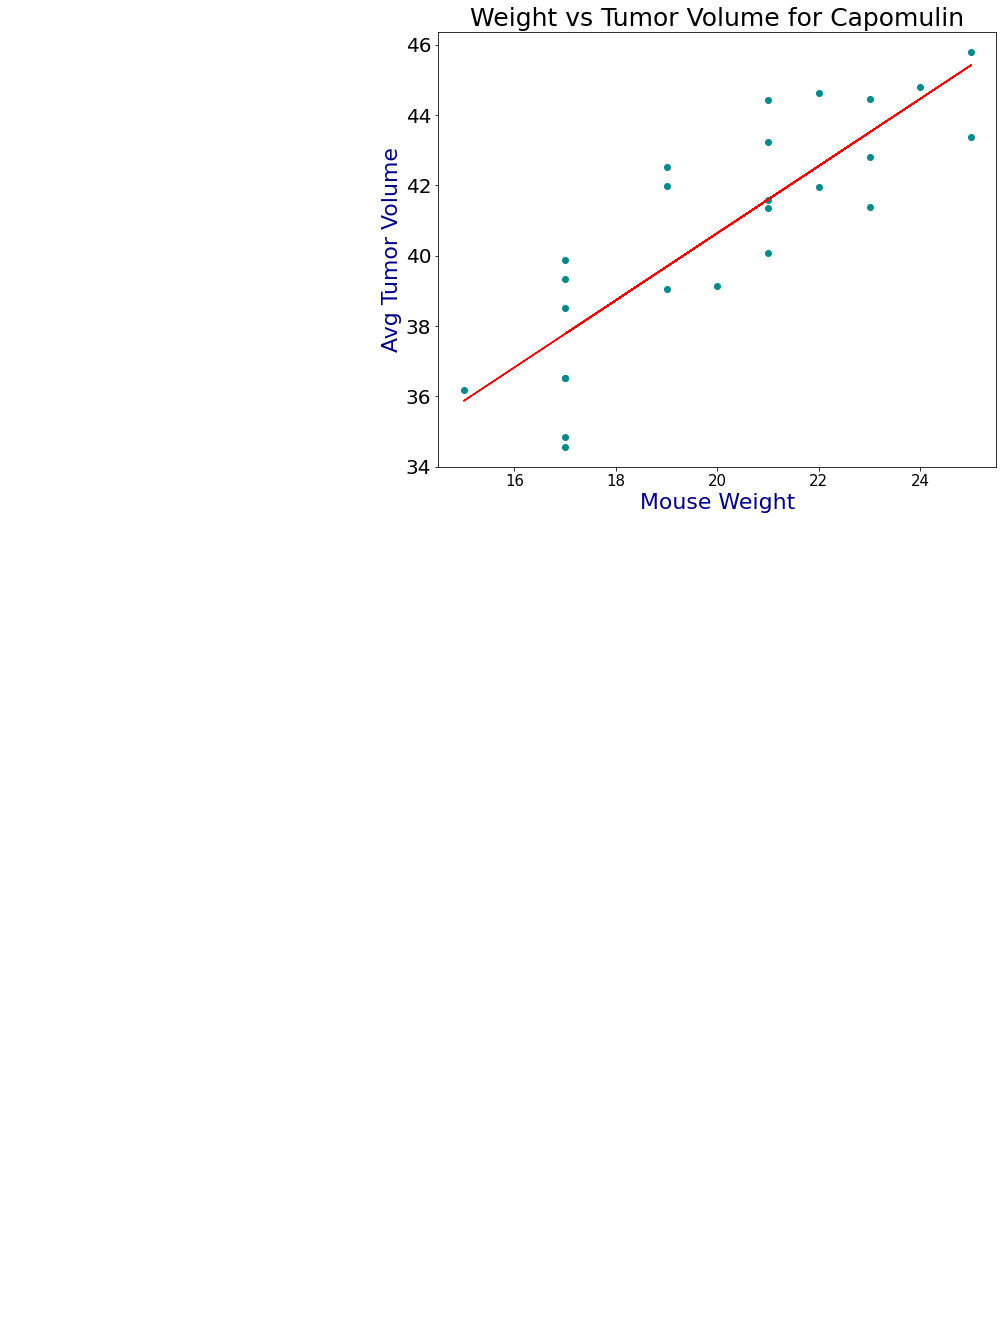

In [27]:
# Calculate linear regression model for mouse weight and average tumor volume for the Capomulin regimen
plt.figure(figsize = (10,8))
x_values = avg_capo["Weight (g)"]
y_values = avg_capo["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

# Using scatter plot, show linear regression line
plt.scatter(x_values,y_values, color= "darkcyan")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Weight vs Tumor Volume for Capomulin', size = 25)
plt.xlabel('Mouse Weight',size= 22,  color= "darkblue")
plt.ylabel('Avg Tumor Volume', size= 22, color= "darkblue")

plt.savefig("Graphs/Linregress_Wt_TumorVol")
plt.show()